# Week 2, Lab 1: Data Understanding

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
# Load the dataset

df=pd.read_csv('income.csv')
df.head()

,ID,Age,Income,Height,Credit Score,Dept,Country,Occupation,Date of Joining
0,1,62,50000.0,193.0,509.0,488.563060,UK,Teacher,7/14/2023
1,2,65,1000000.0,187.0,316.0,312.467648,Germany,Doctor,12/1/2023
2,3,18,150000.0,178.0,406.0,387.337992,Australia,Artist,6/20/2022
3,4,-2,200000.0,197.0,464.0,678.652685,France,Artist,3/28/2023
4,5,21,200000.0,190.0,836.0,411.977741,Japan,Lawyer,5/19/2022


In [3]:
df.columns

Index(['ID', 'Age', 'Income', 'Height', 'Credit Score', 'Dept', 'Country',
       'Occupation', 'Date of Joining'],
      dtype='object')

In [6]:
dataset_size = df.shape
print('Dataset Size:', dataset_size)

Dataset Size: (100, 9)


***So we have 100 people (rows), and 9 columns***

In [7]:
df.describe()

,ID,Age,Income,Height,Credit Score,Dept
count,100.000000,100.00000,80.000000,95.000000,95.000000,100.000000
mean,50.500000,40.55000,232812.500000,176.421053,572.442105,529.379719
std,29.011492,26.89312,291936.836143,14.022458,154.830018,328.055716
min,1.000000,-9.00000,20000.000000,150.000000,304.000000,-21.788330
25%,25.750000,25.50000,50000.000000,167.000000,438.000000,353.835110
50%,50.500000,38.00000,100000.000000,178.000000,580.000000,494.493787
75%,75.250000,56.00000,200000.000000,188.000000,703.500000,637.867770
max,100.000000,164.00000,1000000.000000,199.000000,842.000000,2500.439764


Some takeaways:
+ Not all *incomes*, *heights*, and *credit scores* have been inputted
+ Mean age is 40, mean income is $232,812
+ Std of Income looks pretty weird
+ Youngest person is -9 years old?
+ Oldest person here is 164 years old?

Lets check the categorical variables, which would be **Country** and **Occupation**

In [8]:
df['Country'].unique()
# This will look at the COUNTRY column, and see the variables with no repeat

array(['UK', 'Germany', 'Australia', 'France', 'Japan', 'Canada', 'USA',
       'U.S.', 'India'], dtype=object)

In [9]:
df['Occupation'].unique()

array(['Teacher', 'Doctor', 'Artist', 'Lawyer', 'Artxst', 'Engxneer',
       'Nurse', 'Engineer', 'Docxor', 'Teaxher'], dtype=object)

Note that we have some mispellings. There's **2 different doctors**, **2 artists**, **2 engineers**, **2 teachers** due to misspelling.

# Understanding the Distribution
Create a for-loop to count the values for the categorical variables

In [26]:
for col in df.select_dtypes(include='object').columns:
    print(f"Value of {col}: \n{df[col].value_counts()}\n")

Value of Country: 
Country
Australia    17
France       13
Germany      12
Canada       12
U.S.         10
UK            9
Japan         9
USA           9
India         9
Name: count, dtype: int64

Value of Occupation: 
Occupation
Nurse       24
Artist      17
Teacher     15
Engineer    14
Lawyer      14
Doctor      11
Artxst       2
Engxneer     1
Docxor       1
Teaxher      1
Name: count, dtype: int64

Value of Date of Joining: 
Date of Joining
10/6/2023     2
5/14/2023     2
10/27/2023    2
2/14/2023     2
6/30/2022     1
             ..
2/16/2022     1
5/16/2022     1
4/8/2023      1
11/5/2023     1
4/26/2022     1
Name: count, Length: 96, dtype: int64



A few things to note here:
+ There's only 5 misspelled occupations
+ "Date of Joining" has been considered an "object" (categorical) datatype, when it is a date/time datatype

### Let's check the data types

In [29]:
data_types=df.dtypes
print(data_types)

ID                   int64
Age                  int64
Income             float64
Height             float64
Credit Score       float64
Dept               float64
Country             object
Occupation          object
Date of Joining     object
dtype: object


Let's convert "Date of Joining" variable to a datetime format

In [30]:
df["Date of Joining"]=pd.to_datetime(df["Date of Joining"])

In [31]:
data_types=df.dtypes
print(data_types)

ID                          int64
Age                         int64
Income                    float64
Height                    float64
Credit Score              float64
Dept                      float64
Country                    object
Occupation                 object
Date of Joining    datetime64[ns]
dtype: object


## Check for Invalid Entries
Let's count how many negative values are in the columns

In [58]:
invalid_entries = df[df.select_dtypes(include='number') <0].count()

This takes a dataframe with selected numerical columns less than 0, and counts them

In [40]:
print("Invalid Entries:\n", invalid_entries)

Invalid Entries:
 ID                 0
Age                9
Income             0
Height             0
Credit Score       0
Dept               1
Country            0
Occupation         0
Date of Joining    0
dtype: int64


In [43]:
df[df.select_dtypes(include='number') <0]

,ID,Age,Income,Height,Credit Score,Dept,Country,Occupation,Date of Joining
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,NaN,-2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...
95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


So there are **9 values in Age** and **1 value in Dept** that comes out negative

## Check for Duplicate Records

In [79]:
duplicates=df.duplicated().sum()
print("Number of Duplicate Records: ", duplicates)

Number of Duplicate Records:  0


### Removing Duplicate Records

In [80]:
df=df.drop_duplicates()

## Check for Missing Data

In [87]:
missing_data=df.isnull().sum()
print("Missing data:\n", missing_data)

Missing data:
 ID                  0
Age                 9
Income             20
Height              5
Credit Score        5
Dept                0
Country             0
Occupation          0
Date of Joining     0
dtype: int64


*Look at data visualization to see how to visualize this*

# Handling and Cleaning Invalid Entries

### Replacing Invalid Entries with NaN

In [60]:
df.loc[df['Age']<0,'Age']=None
df.loc[df['Dept']<0,'Dept']=None

In [63]:
invalid_entries = df[df.select_dtypes(include='number') <0].count()
print("Invalid Entries:\n", invalid_entries)

Invalid Entries:
 ID                 0
Age                0
Income             0
Height             0
Credit Score       0
Dept               0
Country            0
Occupation         0
Date of Joining    0
dtype: int64


### Replacing Invalid Entries with Median/Mean (Uncommon)

In [65]:
invalid_entries = df[df.select_dtypes(include='number') <0].count()
print("Invalid Entries:\n", invalid_entries)

Invalid Entries:
 ID                 0
Age                9
Income             0
Height             0
Credit Score       0
Dept               1
Country            0
Occupation         0
Date of Joining    0
dtype: int64


In [76]:
median_age = df['Age'][df['Age']>=0].median()
df.loc[df['Age']<0,'Age']=median_age

In [77]:
median_age=df['Dept'][df['Dept']>=0].median()
df.loc[df['Dept']<0,'Dept']=median_age

In [78]:
invalid_entries = df[df.select_dtypes(include='number') <0].count()
print("Invalid Entries:\n", invalid_entries)

Invalid Entries:
 ID                 0
Age                0
Income             0
Height             0
Credit Score       0
Dept               0
Country            0
Occupation         0
Date of Joining    0
dtype: int64


# Initial Data Visualization

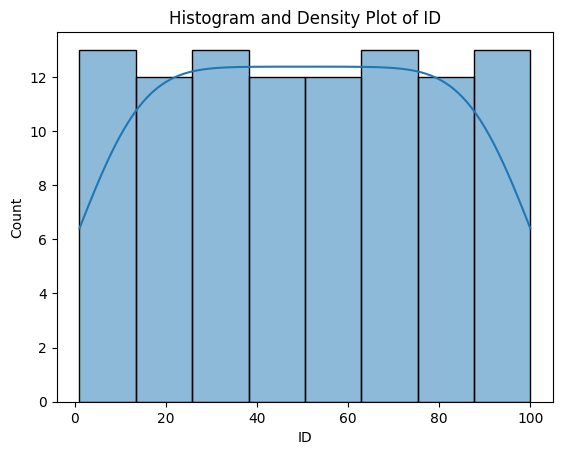

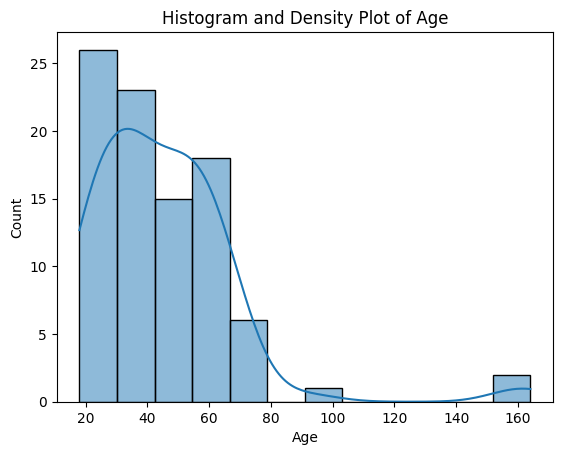

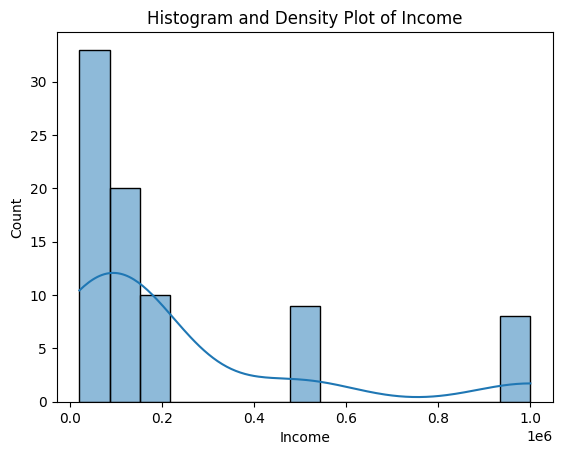

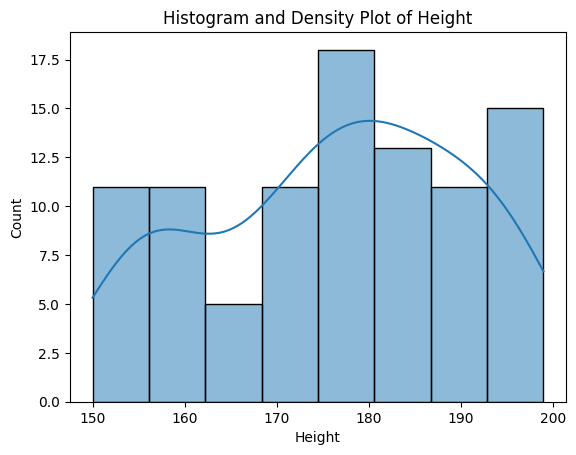

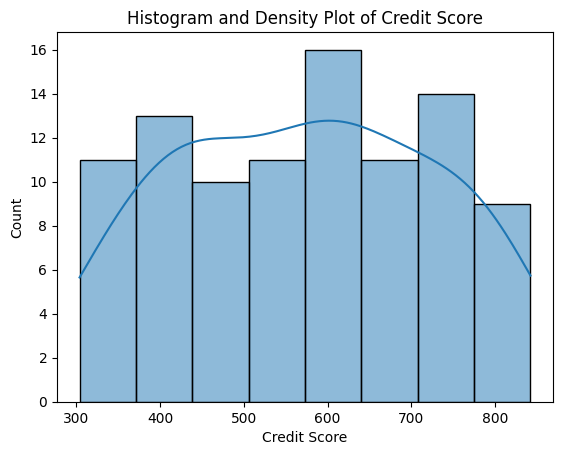

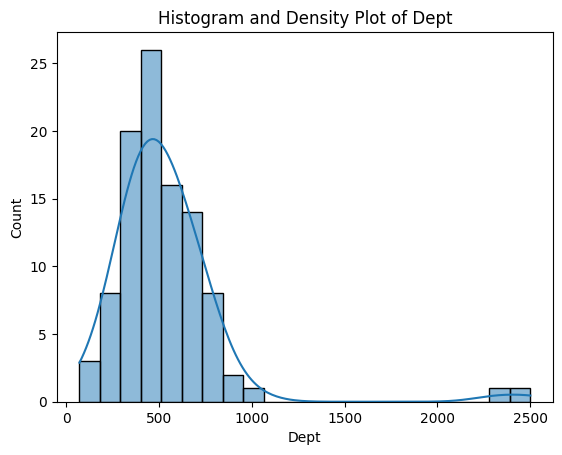

In [81]:
# Visualizing all columns in one code
for col in df.select_dtypes(include=['number']).columns:
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram and Density Plot of {col}")
    plt.show()

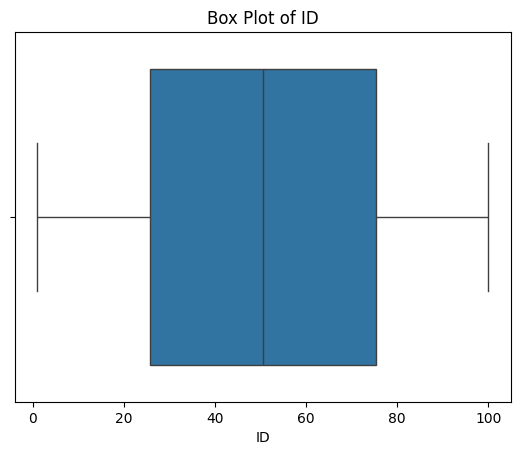

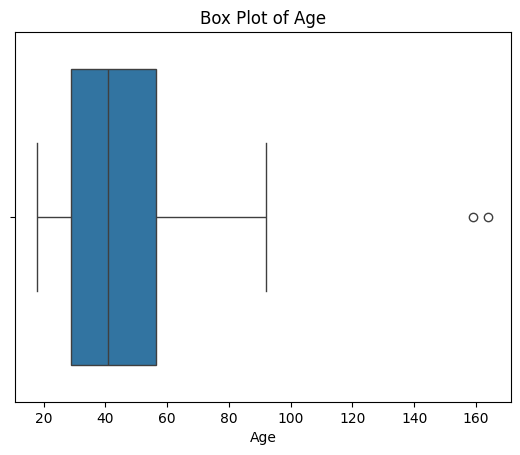

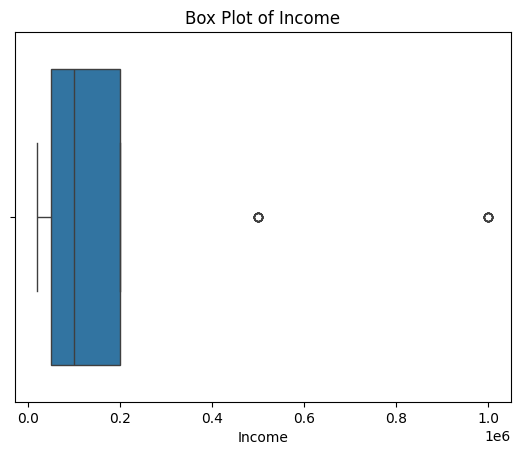

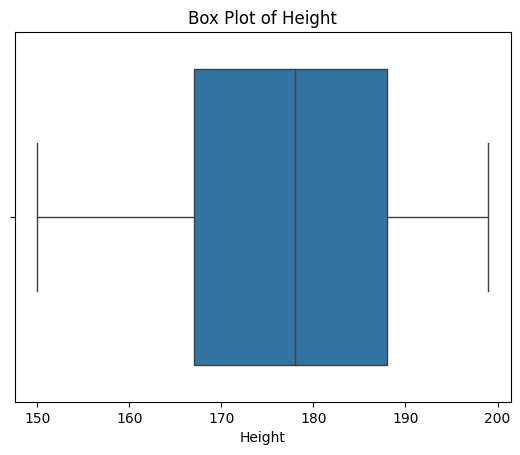

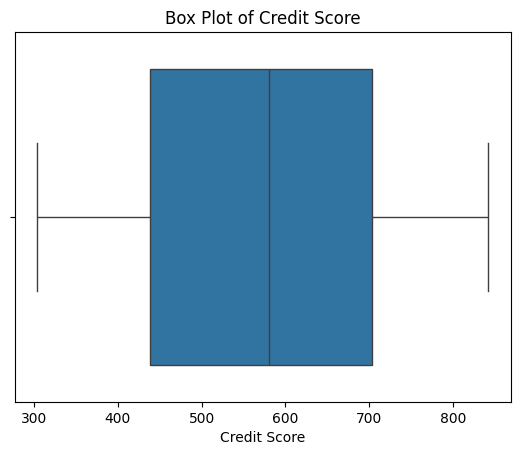

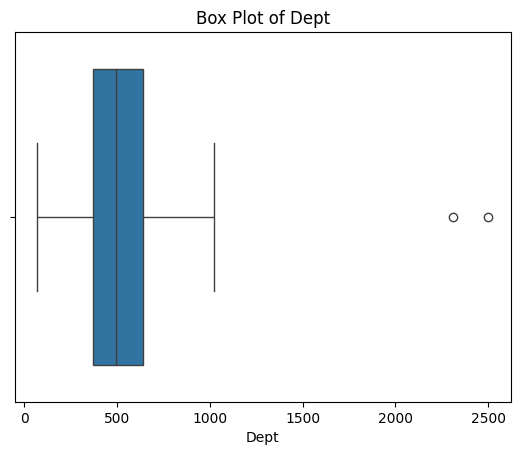

In [82]:
for col in df.select_dtypes(include=['number']).columns:
  sns.boxplot(x=df[col])
  plt.title(f"Box Plot of {col}")
  plt.show()

/home/sarahesayas/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


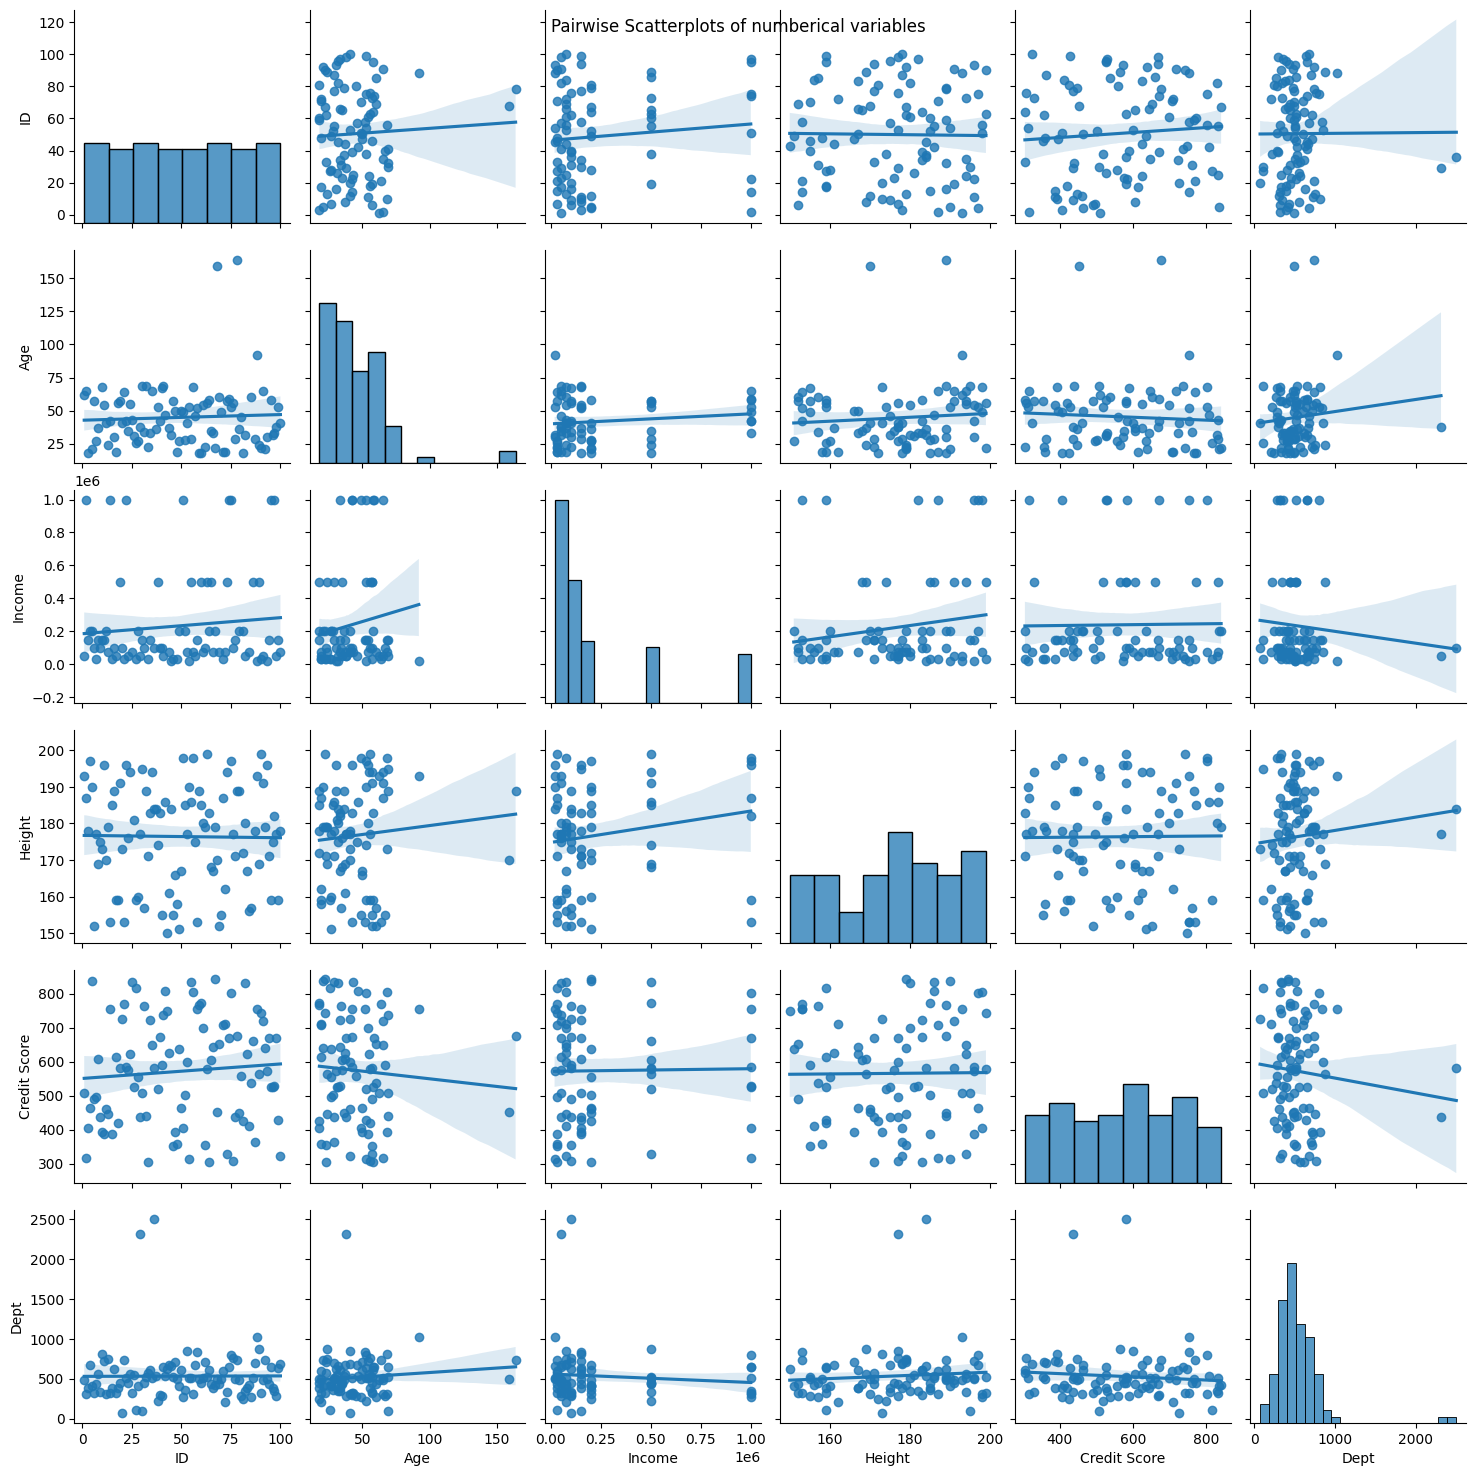

In [83]:
sns.pairplot(df.select_dtypes(include=['number']), kind='reg')
plt.suptitle("Pairwise Scatterplots of numberical variables")
plt.show()

### Correlation Matrix

In [85]:
correlation_matrix=df.corr(numeric_only=True)
correlation_matrix

,ID,Age,Income,Height,Credit Score,Dept
ID,1.000000,0.050628,0.099468,-0.013442,0.081187,0.005020
Age,0.050628,1.000000,0.136303,0.085174,-0.070059,0.101013
Income,0.099468,0.136303,1.000000,0.172092,0.014265,-0.087418
Height,-0.013442,0.085174,0.172092,1.000000,0.009295,0.085600
Credit Score,0.081187,-0.070059,0.014265,0.009295,1.000000,-0.093961
Dept,0.005020,0.101013,-0.087418,0.085600,-0.093961,1.000000


There's not really a strong correlation in any of these, the strongest would have to be between **Height** and **Income**, with a correlation of 0.17. **Age** and **Income**, have a correlation of 0.14

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

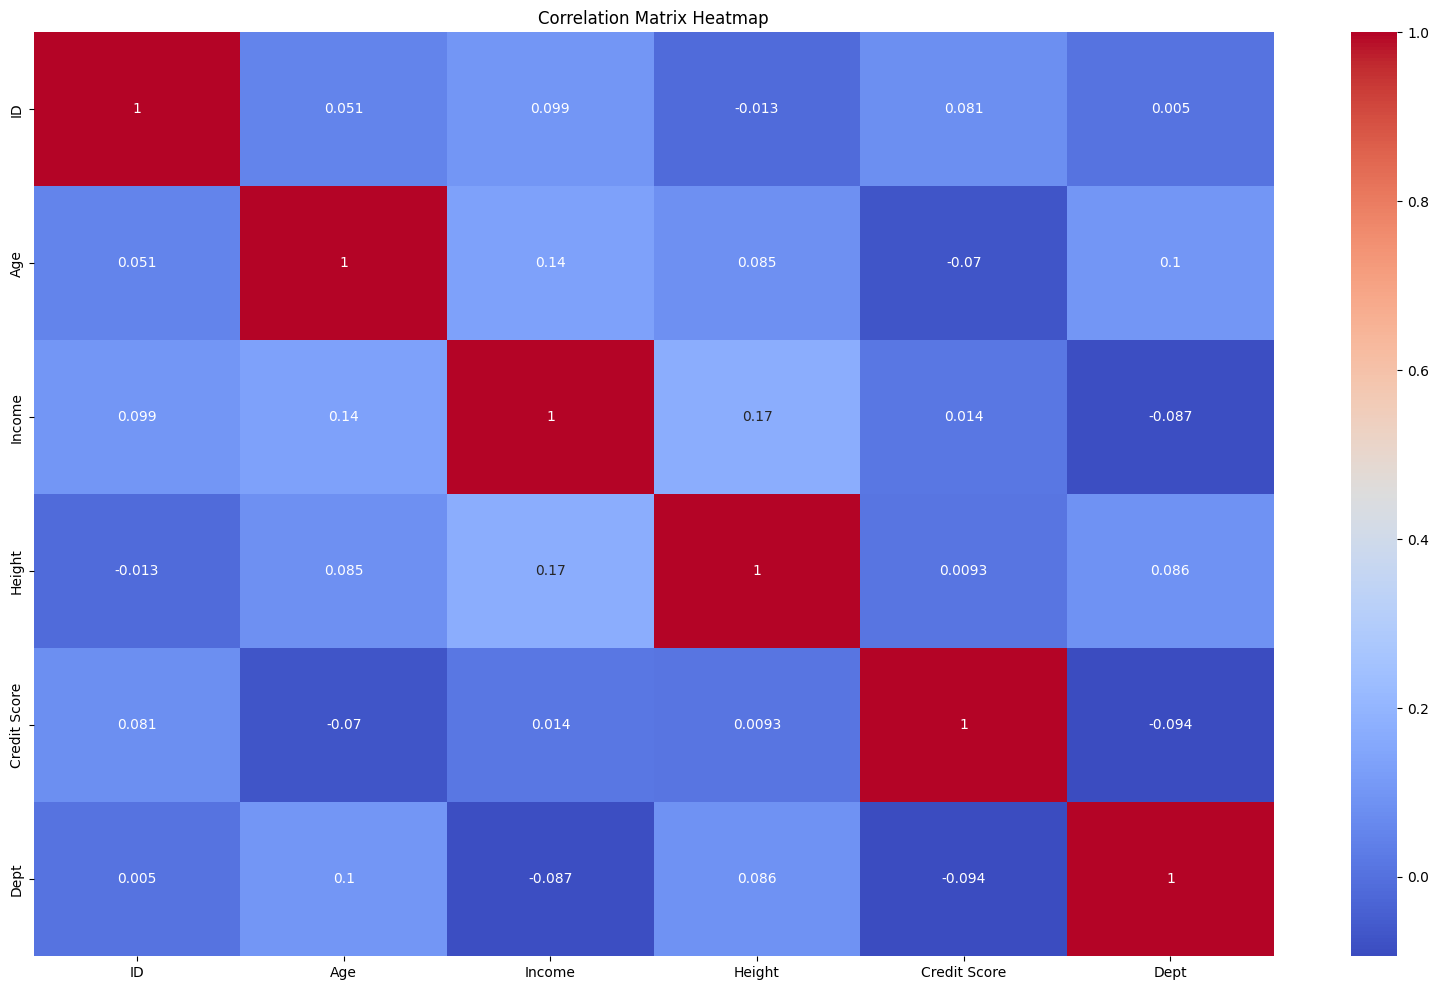

In [86]:
plt.figure(figsize=(20,12))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')

In [90]:
!pip install missingno

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python3 -m pip install --upgrade pip


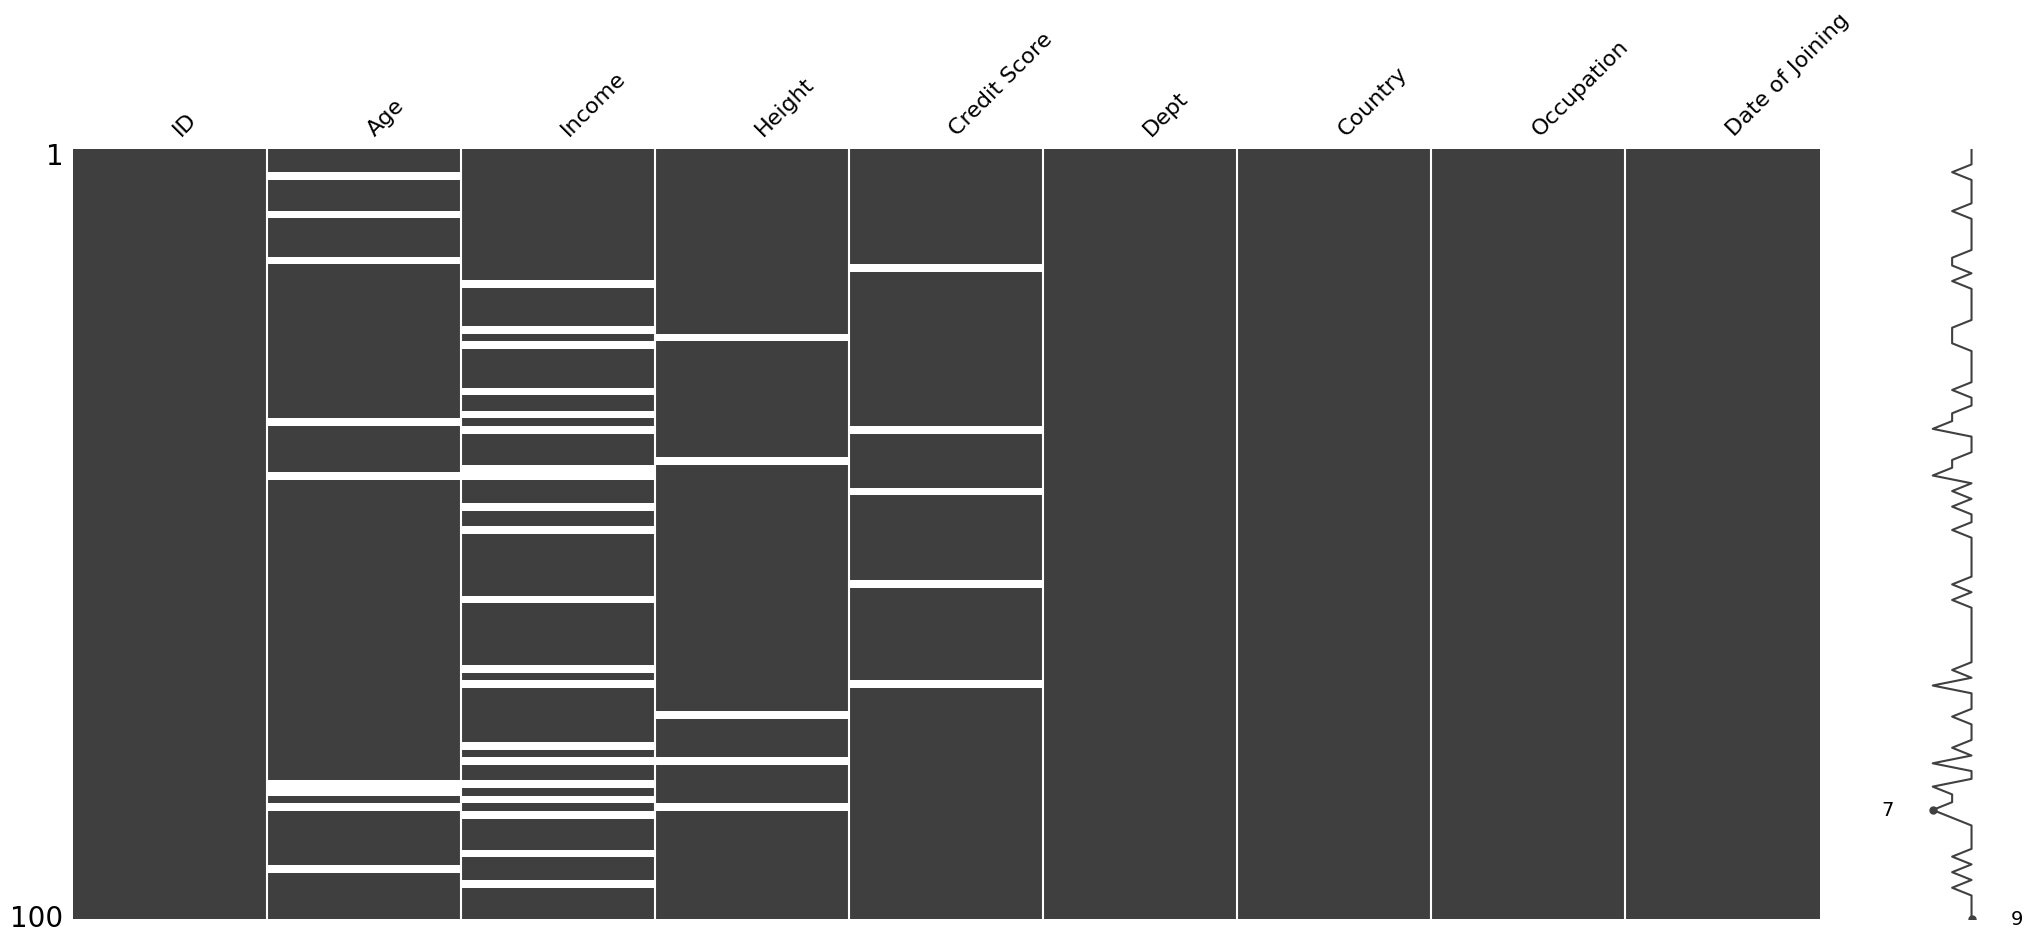

In [91]:
import missingno as msno

msno.matrix(df)
plt.show()